# Исследование объявлений о продаже квартир

## Изучение данных из файла

In [235]:
import pandas as pd

In [236]:
import matplotlib.pyplot as plt

In [237]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [238]:
pd.set_option('display.max_columns', 500)

In [239]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Каждая строка таблицы содержит информацию о квартире в Санкт-Петербурге или соседнем населённом пункте. Информация была размещена пользователями в виде объявления о продаже. Для того, чтобы можно было провести исследование этих данных и установить параметры, от которых зависит рыночная стоимость квартир, необходимо сначала удалить или заполнить пропуски в данных и произвести замену типов данных в некоторых переменных.

## Предобработка данных

Исключим пропуски и переименуем столбцы.

In [241]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В названии столбца cityCenters_nearest используется два регистра, а в в названиях ponds_around3000 parks_around3000 цифры.  Переименуем их для удобства дальнейшей работы. Проверим результат. Затем вызовем готовую функцию для того, чтобы наглядно увидеть, где и сколько пропущенных значений.

In [242]:
df = df.rename(columns={'first_day_exposition': 'first_day_exp', 'cityCenters_nearest': 'citycenters_nearest',
                        'parks_around3000': 'parks_around', 'ponds_around3000': 'ponds_around', 'days_exposition': 'days_exp'})


In [243]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exp', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around', 'parks_nearest', 'ponds_around', 'ponds_nearest',
       'days_exp'],
      dtype='object')

In [244]:
df.head()

,total_images,last_price,total_area,first_day_exp,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exp
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [245]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exp,0
rooms,0
ceiling_height,38.8
floors_total,0.36
living_area,8.03
floor,0
is_apartment,88.29


Больше всего пропущенных значений (88%) в столбце is_apartment (апартаменты (булев тип)), 66% пропусков в parks_nearest (расстояние до ближайшего парка), 62% в ponds_neares (расстояние до ближайшего водоёма ), 49% в balcony (число балконов), 39% в ceiling_height (высота потолков), почти одинаковое количество пропусков (примерно 23%) в столбцах airports_nearest, cityCenters_nearest, parks_around и ponds_around, 14% пропусков в столбце days_exp (сколько дней было размещено объявление), 10% в столце kitchen_area (площадь кухни), 8% в столбце living_area (жилая площадь) и совсем мало в столбцах floors_total (всего этажей в доме) и locality_name (название населённого пункта) - 0.36% и 0,21% соответственно.

Если человек не указал число балконов — скорее всего, их нет. Поэтому заменим пропуски на 0.

In [246]:
df['balcony'] = df['balcony'].fillna(0)

В столбце floors_total и locality_name пропущенных значений меньше 1%, удалим их.

In [247]:
df.dropna(subset = ['floors_total'], inplace = True)

In [248]:
df.dropna(subset = ['locality_name'], inplace = True)

38% пропусков в столбце с высотой потолков это много. Нам предстоит научиться определять рыночную стоимость объектов недвижимости, а такой параметр как высота потолков может влиять на стоимость, исходя из реальной жизни. Заменим их на медиану по всем значениям высоты потолков.

In [249]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Из всех параметров, что мы имеем в данных жилая площадь living_area вероятнее всего может зависеть от общей площади total_area объекта недвижимости. Разделим наши данные по столбцу total_area на примерно равные группы по количествую записей. Заменим пропущенные значения в living_area на медианы, взятые по  группам, которые получились у нас по столбцу total_area.

In [250]:
df['total_area_cut'] = pd.qcut(df['total_area'], 5)

In [251]:
df.groupby('total_area_cut')['living_area'].agg(['count', 'median', 'mean'])

,count,median,mean
total_area_cut,,,
"(11.999, 37.6]",4389,17.0,17.054377
"(37.6, 46.0]",4548,20.2,22.631044
"(46.0, 58.0]",4188,30.5,30.514628
"(58.0, 74.8]",4260,40.0,39.258838
"(74.8, 900.0]",4315,55.0,63.697351


In [252]:
df['living_area'] = df.groupby(['total_area_cut'])['living_area'].apply(lambda x: x.fillna(x.median()))

В столбце kitchen_area заменим пропуски на медианы по группам из total_area.

In [253]:
df['kitchen_area'] = df.groupby(['total_area_cut'])['kitchen_area'].apply(lambda x: x.fillna(x.median()))

In [254]:
df.drop('total_area_cut', axis=1, inplace=True)

In [255]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exp,0
rooms,0
ceiling_height,0
floors_total,0
living_area,0
floor,0
is_apartment,88.29


Остальные пропуски заменить нечем. Расстояние до парка, до центра, до аэропорта и водоёмов были получены автоматически на основе картографических данных, возможно для их определения не хватило данных о местонахождении квартиры. Количество дней от публикации до снятия объявления тоже могло не сохраниться в связи с какими-то сбоями. Большое количество пропусков в столбце is_apartment тоже оставим как есть, тк для нашего исследования эти значения не понадобятся.

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images           23565 non-null int64
last_price             23565 non-null float64
total_area             23565 non-null float64
first_day_exp          23565 non-null object
rooms                  23565 non-null int64
ceiling_height         23565 non-null float64
floors_total           23565 non-null float64
living_area            23565 non-null float64
floor                  23565 non-null int64
is_apartment           2760 non-null object
studio                 23565 non-null bool
open_plan              23565 non-null bool
kitchen_area           23565 non-null float64
balcony                23565 non-null float64
locality_name          23565 non-null object
airports_nearest       18041 non-null float64
citycenters_nearest    18064 non-null float64
parks_around           18065 non-null float64
parks_nearest          8030 non-null float64
ponds_around           18065 non-n

Изменим типы данных в столбцах: last_price, first_day_exp, floors_total, balcony и first_day_exp.

In [257]:
df['first_day_exp'] = pd.to_datetime(
    df['first_day_exp'], format='%Y-%m-%dT%H:%M:%S')

В переменных balcony, last_price, floors_total, заменим тип данных с вещественного на целочисленный.

In [258]:
df['last_price'] = df['last_price'].astype('int')

In [259]:
df['balcony'] = df['balcony'].astype('int')

In [260]:
df['floors_total'] = df['floors_total'].astype('int')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images           23565 non-null int64
last_price             23565 non-null int64
total_area             23565 non-null float64
first_day_exp          23565 non-null datetime64[ns]
rooms                  23565 non-null int64
ceiling_height         23565 non-null float64
floors_total           23565 non-null int64
living_area            23565 non-null float64
floor                  23565 non-null int64
is_apartment           2760 non-null object
studio                 23565 non-null bool
open_plan              23565 non-null bool
kitchen_area           23565 non-null float64
balcony                23565 non-null int64
locality_name          23565 non-null object
airports_nearest       18041 non-null float64
citycenters_nearest    18064 non-null float64
parks_around           18065 non-null float64
parks_nearest          8030 non-null float64
ponds_around           18065 non

In [262]:
df.head(50)

,total_images,last_price,total_area,first_day_exp,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exp
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,55.00,9,NaN,False,False,14.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,NaN,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,40.00,22,NaN,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,NaN,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод


По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. В данных, внесённых пользователями были пропуски в параметрах: кол-во этажей в доме, высота потолков, число балконов, жилая площадь, площадь кухни, название населённого пункта. Мы заменили число балконов на 0, высоту потолков на медиану, жилую и площадь и площадь кухни на медиану по группам из общей площади, а пропусков значений в названии населённого пункта и кол-ва этажей было мене 1% и мы их удалили. Оставшиеся пропуски заполнить не представляется возможным, удалять их нельзя, тк потяряется очень много информации. Оставим их как есть.

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [263]:
df['meter_price'] = df['last_price'] / df['total_area']

In [264]:
df['weekday'] = df['first_day_exp'].dt.weekday

In [265]:
df['month'] = df['first_day_exp'].dt.month

In [266]:
df['year'] = df['first_day_exp'].dt.year

In [267]:
def find_floor(row):
    i = row['floor']
    if i == 1:
       return 'первый этаж'
    elif i == row['floors_total']:
       return 'последний этаж'
    else:
       return 'другой этаж'

In [268]:
df['floor_cut'] = df.apply(find_floor, axis=1)

In [269]:
df['area_ratio_lt'] = df['living_area'] / df['total_area']

In [270]:
df['area_ratio_kt'] = df['kitchen_area'] / df['total_area']

In [271]:
df.head(50)

,total_images,last_price,total_area,first_day_exp,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exp,meter_price,weekday,month,year,floor_cut,area_ratio_lt,area_ratio_kt
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой этаж,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый этаж,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой этаж,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14,55.00,9,NaN,False,False,14.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой этаж,0.345912,0.088050
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой этаж,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой этаж,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,NaN,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой этаж,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.65,24,40.00,22,NaN,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой этаж,0.558659,0.263966
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,NaN,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой этаж,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой этаж,0.714754,0.106557


### Вывод


В таблицу были добавлены новые столбцы: meter_price, weekday, month, year, floor_cut, area_ratio_lt и area_ratio_kt.

## Исследовательский анализ данных

### Какие бывают квартиры?

Изучим гистограмму значений площадей квартир.

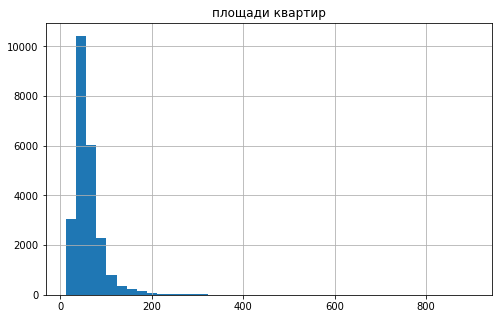

In [272]:
df['total_area'].hist(bins = 40, figsize=(8,5))
plt.title('площади квартир')
plt.show()

In [273]:
df['total_area'].max()

900.0

In [274]:
df['total_area'].min()

12.0

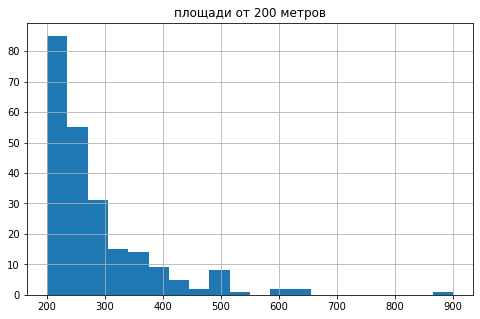

In [275]:
df['total_area'].hist(bins = 20, range = (200, 900), figsize=(8,5))
plt.title('площади от 200 метров')
plt.show()

Квартиры с площадью более 100 кв м — редкость. Больше 200 кв м встречаются ещё реже. А на участке более 300 кв м гистограмма сливается с нулём. Если посмотреть отрезок значений от 200 до 900 на гистограмме поближе, то хорошо видно, что квартир с площадью более 300 кв метра - единицы. Их посчитаем выбивающимся значениями и не будем использовать в нашем исследовании.

Изучим гистограмму значений цен на недвижимость.

In [276]:
df['last_price'].min()

12190

In [277]:
df['last_price'].max()

763000000

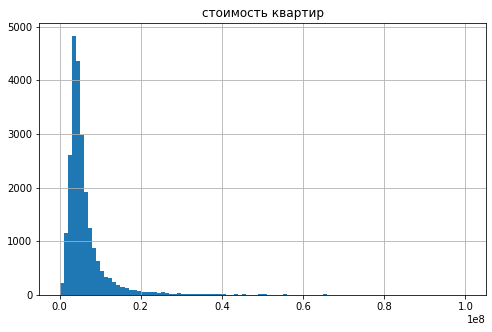

In [278]:
df['last_price'].hist(bins = 100, range = (0, 100000000), figsize=(8,5))
plt.title('стоимость квартир')
plt.show()

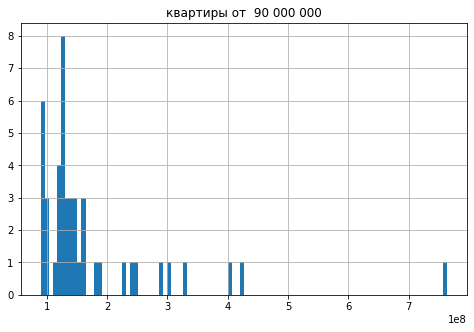

In [279]:
df['last_price'].hist(bins = 100, range = (90000000, 763000000), figsize=(8,5))
plt.title('квартиры от  90 000 000')
plt.show()

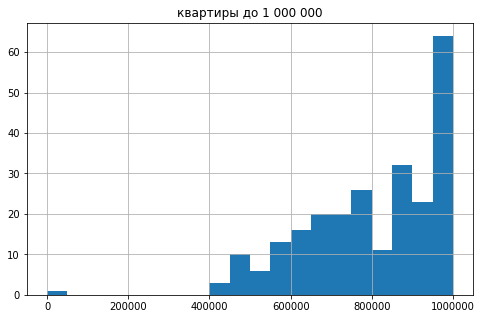

In [280]:
df['last_price'].hist(bins = 20, range = (0, 1000000), figsize=(8,5))
plt.title('квартиры до 1 000 000')
plt.show()

Квартиры стоимостью более 20 000 000 - редкость. Есть выбивающиеся значения в диапазоне от 90 000 000 до 763 000 000, а так же минимальное значение 12 190, которое очень похоже на ошибку. Квартиры стоимостью до 1 000 000 тоже встречаются очень редко. 

Изучим гистограмму значений количества комнат.

In [281]:
df['rooms'].max()

19

In [282]:
df['rooms'].min()

0

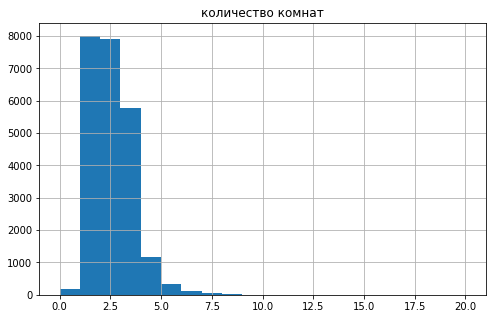

In [283]:
df['rooms'].hist(bins = 20, range = (0,20), figsize=(8,5))
plt.title('количество комнат')
plt.show()

In [284]:
df.query('rooms < 1')

,total_images,last_price,total_area,first_day_exp,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exp,meter_price,weekday,month,year,floor_cut,area_ratio_lt,area_ratio_kt
144,1,2450000,27.00,2017-03-30,0,2.65,24,15.50,2,NaN,True,False,8.0,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,90740.740741,3,3,2017,другой этаж,0.574074,0.296296
349,4,2320000,25.00,2017-09-27,0,2.65,14,17.00,1,NaN,False,True,8.0,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,92800.000000,2,9,2017,первый этаж,0.680000,0.320000
440,8,2480000,27.11,2018-03-12,0,2.65,17,24.75,4,NaN,True,False,8.0,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,91479.158982,0,3,2018,другой этаж,0.912947,0.295094
508,0,3375000,34.40,2017-03-28,0,2.65,26,24.30,19,NaN,False,True,8.0,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,98110.465116,1,3,2017,другой этаж,0.706395,0.232558
608,2,1850000,25.00,2019-02-20,0,2.65,10,17.00,7,NaN,True,False,8.0,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,74000.000000,2,2,2019,другой этаж,0.680000,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,2.65,25,18.00,16,NaN,True,False,8.0,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,123076.923077,4,9,2017,другой этаж,0.692308,0.307692
23442,0,2500000,27.70,2017-09-28,0,2.65,24,18.00,4,NaN,False,True,8.0,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,90252.707581,3,9,2017,другой этаж,0.649819,0.288809
23554,15,3350000,26.00,2018-09-07,0,2.65,19,17.00,8,NaN,True,False,8.0,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,128846.153846,4,9,2018,другой этаж,0.653846,0.307692
23592,10,1450000,29.00,2017-11-11,0,2.65,9,18.00,8,NaN,False,True,8.0,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,50000.000000,5,11,2017,другой этаж,0.620690,0.275862


In [285]:
df.query('rooms < 1').pivot_table(index='kitchen_area', values=('rooms', 'living_area'), aggfunc=('count', 'mean'))

living_area            rooms     
                   count       mean count mean
kitchen_area                                  
8.0                  184  17.773478   184    0
9.0                    5  28.104000     5    0
9.8                    3  50.333333     3    0
14.0                   2  57.750000     2    0

Подозрение вызывают квартиры с количеством комнат 0, при этом жилой площадью в среднем 18 кв м и площадью кухни 8 кв м. Таких объектов 171 шт, они похожи на ошибочные (неверно указано кол-во комнат). Но подозрительно, что их всех объединяет одинаковая площадь кухни. Значение 0 комнат можно было бы рассматривать как квартиры - студии, но мы видим, что в столбце studio встречаются значения как True так и False. Чтобы эти строки не повлияли на наш анализ исключим их все, те все значение 0 в столбце rooms.

Изучим гистограмму значений высоты потолков.

In [286]:
df['ceiling_height'].max()

100.0

In [287]:
df['ceiling_height'].min()

1.0

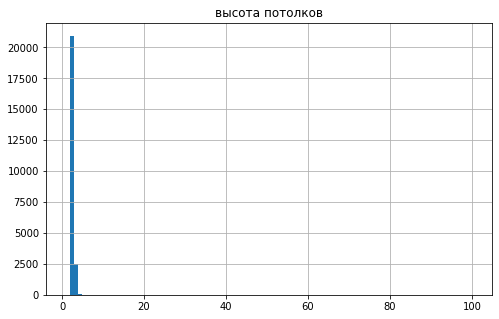

In [288]:
df['ceiling_height'].hist(bins = 100, figsize=(8,5))
plt.title('высота потолков')
plt.show()

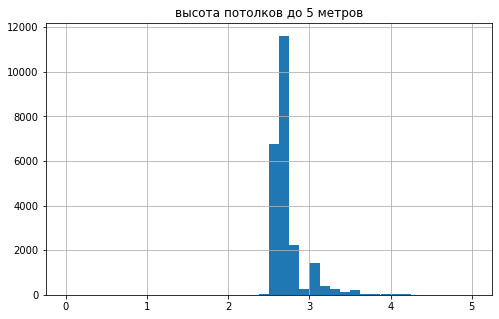

In [289]:
df['ceiling_height'].hist(bins = 40, range = (0,5), figsize=(8,5))
plt.title('высота потолков до 5 метров')
plt.show()

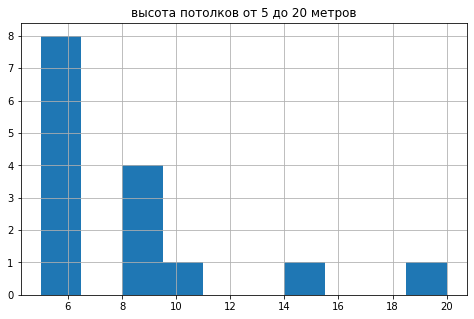

In [290]:
df['ceiling_height'].hist(bins = 10, range = (5, 20), figsize=(8,5))
plt.title('высота потолков от 5 до 20 метров')
plt.show()

Основная масса значений находится в диапазоне от 2,5 до 3м, что похоже на правду, тк по узаконенным строительным нормам и правилам (СНиП) высота потолков в жилых помещениях должна быть не меньше 2.5 метров. Есть единичные значения до 2 метров, а так же 6, 8, 10, 14, 100 м, которые маловероятно соответствуют действительности. Эти значения мы отбросим.

### Сколько времени занимает продажа?

Изучим время продажи квартиры. Оно у нас хранится в переменной days_exp.

In [291]:
df['days_exp'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exp, dtype: float64

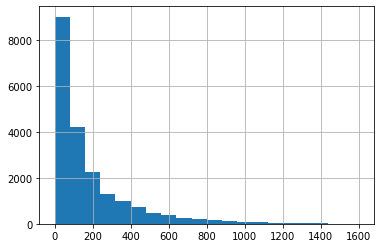

In [292]:
df['days_exp'].hist(bins = 20, range = (0,1600))

Для бОльшей части квартир (75%) продажа не превышала 232 дня.
25% квартир были проданы довольно быстро, продажа заняла по времени не более 45 дней.
В остальных случаях продажа длилась от 232 до 1580 дней, что довольно долго.

**Уберём для нашего исследования редкие и выбивающиеся значения, которые мы обнаружили:**
- площади более 300 кв м
- стоимость меньше 1 000 000 и больше 20 000 000
- количеством комнат равным 0
- высотой потолков меньше 2,5 метра и больше 5 метров

In [293]:
good_df = df.query('total_area < 300 and 1000000 <= last_price <= 20000000 and rooms >= 1 and  2.5 <= ceiling_height <= 5')

In [294]:
good_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22339 entries, 0 to 23698
Data columns (total 29 columns):
total_images           22339 non-null int64
last_price             22339 non-null int64
total_area             22339 non-null float64
first_day_exp          22339 non-null datetime64[ns]
rooms                  22339 non-null int64
ceiling_height         22339 non-null float64
floors_total           22339 non-null int64
living_area            22339 non-null float64
floor                  22339 non-null int64
is_apartment           2627 non-null object
studio                 22339 non-null bool
open_plan              22339 non-null bool
kitchen_area           22339 non-null float64
balcony                22339 non-null int64
locality_name          22339 non-null object
airports_nearest       17177 non-null float64
citycenters_nearest    17194 non-null float64
parks_around           17195 non-null float64
parks_nearest          7459 non-null float64
ponds_around           17195 non

### Что влияет на стоимость квартиры?

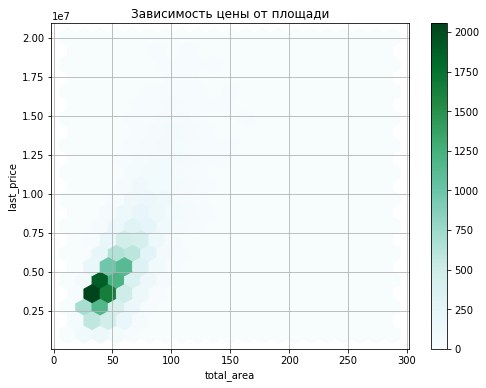

In [295]:
good_df.plot(
    title='Зависимость цены от площади',
    x='total_area',
    y='last_price',
    kind='hexbin',
    gridsize=20,
    sharex=False,
    figsize=(8, 6),
    grid=True)

In [296]:
good_df['last_price'].corr(good_df['total_area'])

0.7744865614136124

В самой «густой» зоне квартиры с площадью от 25 до 50 кв метров и стоимостью от 2 500 000 до 5 000 000. При этом с увеличением площади увеличивается и цена. Коэффициент корреляции Пирсона равен 0.77, что говорит о наличии связи, достаточно большой.

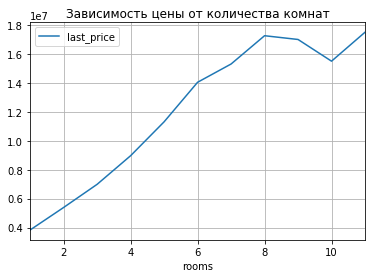

In [297]:
good_df.pivot_table(index='rooms', values='last_price').plot(
    title='Зависимость цены от количества комнат',
    grid=True
)

In [298]:
good_df['last_price'].corr(good_df['rooms'])

0.5134342265044742

Из графика видно, что чем больше в квартире комнат, тем выше стоимость квартиры, что логично. Корреляция в 0,51 говорит о наличии связи, однако не слишком сильной.

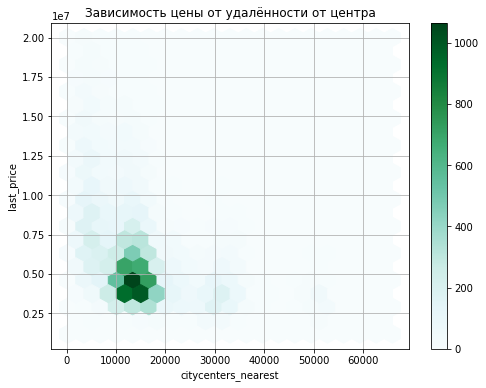

In [299]:
good_df.plot(
    title='Зависимость цены от удалённости от центра',
    x='citycenters_nearest',
    y='last_price',
    kind='hexbin',
    gridsize=20,
    sharex=False,
    figsize=(8, 6),
    grid=True
)

In [300]:
good_df['last_price'].corr(good_df['citycenters_nearest'])

-0.35752494174238847

В самой «густой» зоне квартиры с удалённостью до 20 км и стоимостью от 2 500 000 до 5 000 000. Что-то ещё утверждать трудно. Коэффициент корреляции Пирсона равен -0.34, что говорит о наличии связи (с увеличением удалённость цена уменьшается), но совсем небольшой.

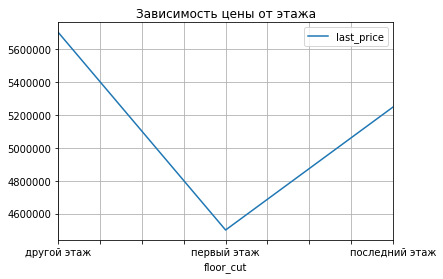

In [301]:
good_df.pivot_table(index='floor_cut', values='last_price').plot(
    title='Зависимость цены от этажа',
    grid=True
)
    

Квартиры на последнем этаже дороже, чем на первом, но дешевле, чем на других этажах.

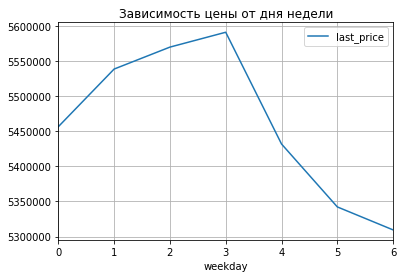

In [302]:
good_df.pivot_table(index='weekday', values='last_price').plot(
    title='Зависимость цены от дня недели',
    grid=True
)

Квартиры размещенные в середине недели стоят дороже всех. Самые низкие цены на квартиры, размещённые в выходные.

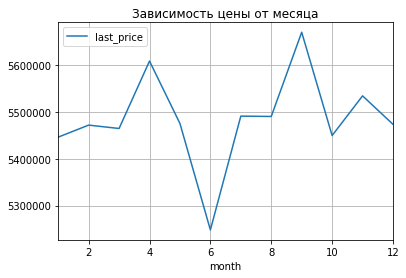

In [303]:
good_df.pivot_table(index='month', values='last_price').plot(
    title='Зависимость цены от месяца',
    grid=True
)

Спад по ценам на квартиры в сезон отпусков (с мая по август), в начале и в конце года цены на квартиры примерно одинаковые.

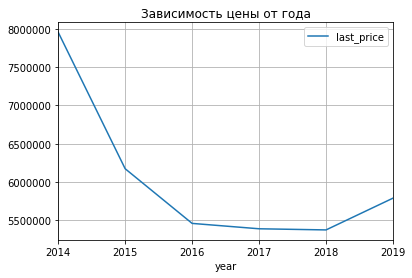

In [304]:
good_df.pivot_table(index='year', values='last_price').plot(
    title='Зависимость цены от года',
    grid=True
)

В период с 2014 по 2018 год произошел существенный спад цен на квартиры. В 2019 году ситуация начала меняться и цены поднялись до уровня 2016 года.

### Сколько стоит квадратный метр?

Выберем 10 населённых пунктов с наибольшим числом объявлений.

In [305]:
good_df.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      14803
посёлок Мурино         493
посёлок Шушары         435
Всеволожск             389
Пушкин                 357
Колпино                336
посёлок Парголово      322
Гатчина                305
деревня Кудрово        283
Выборг                 231
Name: locality_name, dtype: int64

In [306]:
locality_df = good_df.pivot_table(index='locality_name', values='meter_price', aggfunc=('count', 'mean'))

In [307]:
locality_df.columns = ['count', 'mean']

In [308]:
locality_df.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,14803,108581.677726
посёлок Мурино,493,85076.238902
посёлок Шушары,435,78277.935520
Всеволожск,389,67280.218564
Пушкин,357,101799.895665
Колпино,336,75352.475583
посёлок Парголово,322,90320.008898
Гатчина,305,68947.384358
деревня Кудрово,283,92297.218847


Самая низкая стоимость жилья в населённом пункте Выборг (в среднем 57626 за кв метр), а самая высокая стоимость жилья в Санкт-Петербурге (в среднем 106987 за кв метр), что кажется очень логичным.

### Какие они: квартиры в Санкт-Петербурга?

Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр.

In [309]:
sp_locality_df = good_df.query('locality_name == "Санкт-Петербург"')

In [310]:
sp_loc_df = sp_locality_df.copy()

In [311]:
def convert_to_km(row):
    error_count = 0
    try:
        i = row['citycenters_nearest']
        if i == i:
            i = i/1000
        return i
    except:
        error_count+=1

In [312]:
sp_loc_df['citycenters_km'] = sp_loc_df.apply(convert_to_km, axis=1)

In [313]:
sp_loc_df.dropna(subset = ['citycenters_km'], inplace = True)

In [314]:
sp_loc_df['citycenters_km'] = sp_loc_df['citycenters_km'].round().astype('int')

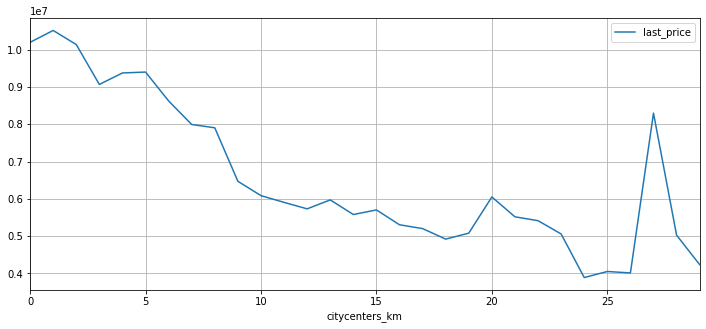

In [315]:
sp_loc_df.pivot_table(index='citycenters_km', values='last_price').plot(
    grid=True,
    figsize=(12, 5)
)

Цена за метр начинает явно снижаться после 7 км, потом после примерно 26 км есть пик - цена снова достигает больших значений, что вызывает вопросы. Возможно, конечно, это какое-то элитное жильё где-то на берегу Финского залива. Из графика можно сделать вывод, что центром считаются квартиры с удалённостью до 7 км. Изучим факторы, которые влияют на цены квартир на этой территории.

In [316]:
def center(row):
    i = row['citycenters_km']
    if i <= 7:
       return 'центр'
    else:
       return 'не центр'

In [317]:
sp_loc_df['center'] = sp_loc_df.apply(center, axis=1)

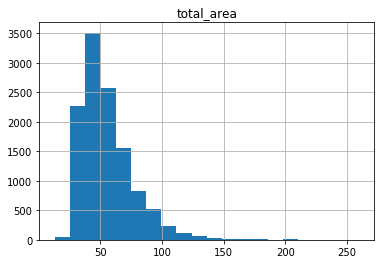

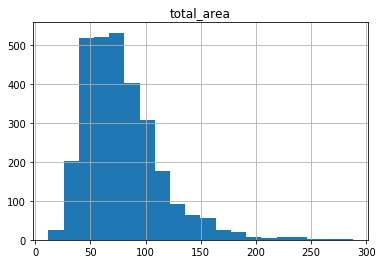

In [318]:
for place, group_df in sp_loc_df.groupby('center'):
    group_df.hist('total_area', bins=20)

Первая гистограмма (для всего города) показывает, что по всему городу преимущественно встречаются квартиры площадью от 30 до 60 метров, а на второй гистограмме (для центра) видно, что в центре в основном встречаются квартиры от 50 до 100 м.

In [319]:
sp_center = sp_loc_df.query('citycenters_km <= 7')

In [320]:
sp_center['total_area'].describe()

count    2963.000000
mean       78.148053
std        34.379009
min        12.000000
25%        53.200000
50%        72.000000
75%        95.100000
max       287.500000
Name: total_area, dtype: float64

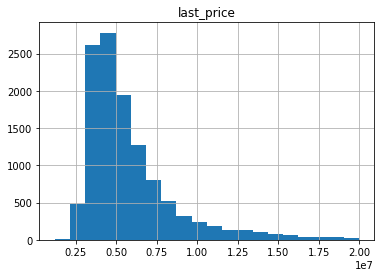

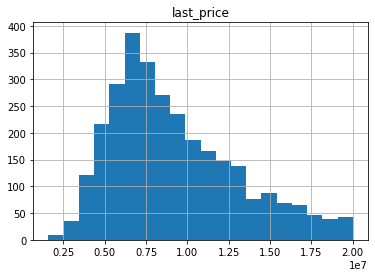

In [321]:
for place, group_df in sp_loc_df.groupby('center'):
    group_df.hist('last_price', bins=20)

Первая гистограмма (по всему городу) говорит о том, что большинство квартир в городе стоит от 3 000 000 до 7 000 000. В основном квартиры в центре стоят от 5 000 000 до 10 000 000.

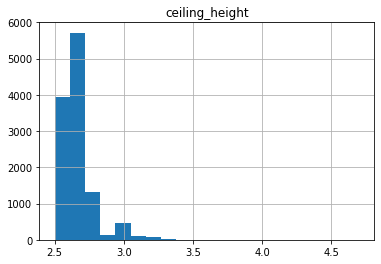

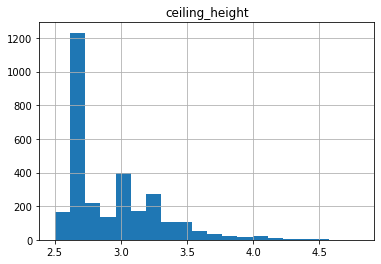

In [322]:
for place, group_df in sp_loc_df.groupby('center'):
    group_df.hist('ceiling_height', bins=20)

Высота потолков у квартир в центре в основном коллеблется от 2.5 до 3 метров (второй график).
Если смотреть по всему городу (первый график), тогда от 2.5 до 2.8 метров.

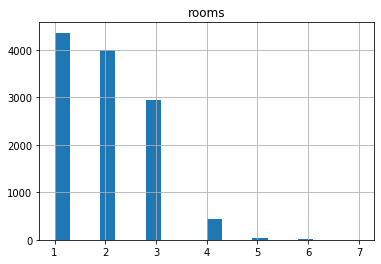

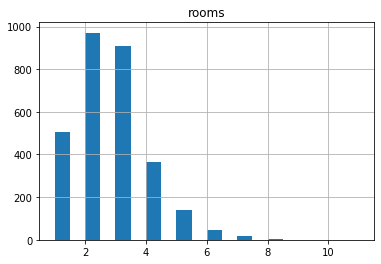

In [323]:
for place, group_df in sp_loc_df.groupby('center'):
    group_df.hist('rooms', bins=20)

Большинство квартир в центре - это квартиры с количество комнат от 2 до 4. (второй график).
А по всему городу большинство квартир с количеством комнат до 3х (второй график).

### Что влияет на стоимость квартир в центре Санкт-Петербурга?

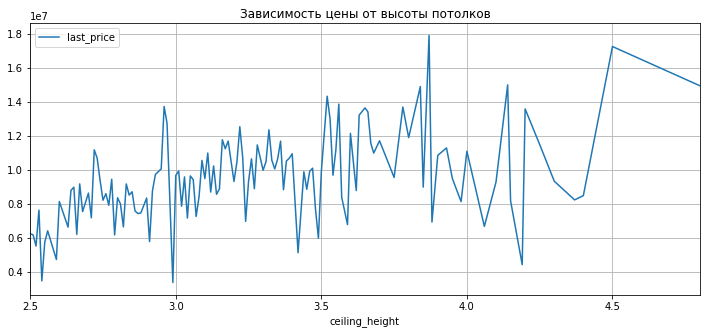

In [324]:
sp_center.pivot_table(index='ceiling_height', values='last_price').plot(
    title='Зависимость цены от высоты потолков',
    grid=True,
    figsize=(12, 5)
)

In [325]:
sp_center['last_price'].corr(sp_center['ceiling_height'])

0.2061140998072749

На графике прослеживается небольшая зависимость цены от высоты потолков, однако корреляция 0,2 говорит о том, что её почти нет.

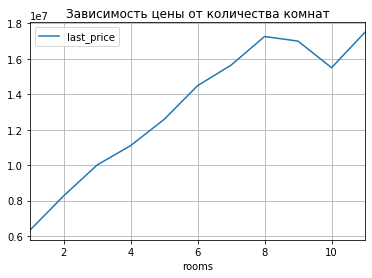

In [326]:
sp_center.pivot_table(index='rooms', values='last_price').plot(
    title='Зависимость цены от количества комнат',
    grid=True,
)

Есть явная зависимость цены квартиры от количества комнат.

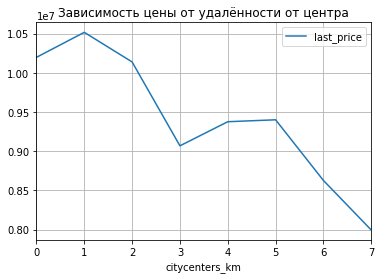

In [327]:
sp_center.pivot_table(index='citycenters_km', values='last_price').plot(
    title='Зависимость цены от удалённости от центра',
    grid=True,
    )

In [328]:
sp_center['last_price'].corr(sp_center['citycenters_km'])

-0.14590719062178092

Есть зависимость цены от удалённости от центра, если смотреть на график, однако коэффициент корреляции говорит о том, что она совсем маленькая. Чем дальше от центра, тем меньше цена.

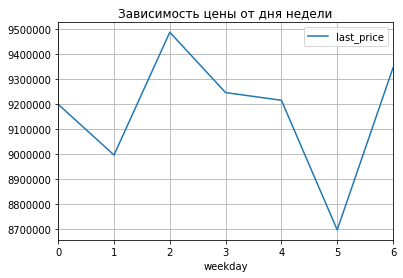

In [329]:
sp_center.pivot_table(index='weekday', values='last_price').plot(
    title='Зависимость цены от дня недели',
    grid=True
)

Квартиры, размещённые в субботу - самые дешевые. А в среду и воскресенье - самые дорогие.

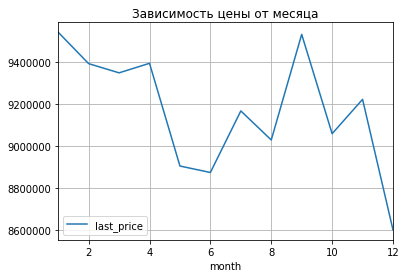

In [330]:
sp_center.pivot_table(index='month', values='last_price').plot(
    title='Зависимость цены от месяца',
    grid=True
)

В декабре цена на квартиры в центре была самая низкая. В мае и июне тоже ниже, чем во все остальные месяцы.

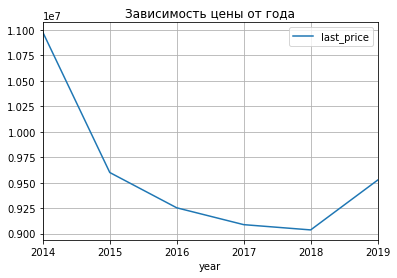

In [331]:
sp_center.pivot_table(index='year', values='last_price').plot(
    title='Зависимость цены от года',
    grid=True
)

В 2014 году средняя стоимость квартиры в центре Санкт-Петербурга достигала 11 000 000, а с 2015 до 2018 средняя стоимость падала уже с 9 500 000 почти до 9 000 000. В 2019 снова выросла до 9 500 000.

### Вывод

Есть достаточно большая взаимосвязь между площадью квартиры и её ценой - чем больше площадь, тем выше цена. Так же цена зависит от количества комнат - чем больше комнат, тем выше цена.
Есть небольшая зависимость цены от удалённости от центра - чем дальше, тем дешевле. Квартиры на последнем этаже дороже, чем на первом, но дешевле, чем на других этажах. Цена зависит и от дня недели, когда было размещено объявление. В выходные обычно размещают самые дешевые квартиры. А в середине недели - самые дорогие. Дешевле всего квартиры стоили в период с мая по август. В начале и середине года цены примерно одинаковые. В 2014 году квартиры стоили дороже, чем в последущих годах. Цены падали до 2018 года, а в 2019 году рынок ожил и цены начали снова расти.


Квартирами в центре Санкт-Петербурга можно считать квартиры в радиусе 7 км по удалённости от центра.
На цену квартир в центре влияет количество комнат, а высота потолков и удалённость от центра влияют, но слабо. В 2014 году средняя стоимость была 11 млн, а с 2015 года происходило падение цен до 9 млн. В 2019 году цены снова стали расти и средняя стоимость достигла 9,5 млн. Самые бюджетныне квартиры размещались по субботам, а самые дорогие - по вторникам. В декабре цены снижались по сравнению с другими месяцами в году.

## Общий вывод

Параметры, влияющие на стоимость квартир - это площадь, количество комнат, этаж, удалённость от центра.  Квартиры в центре стоят дороже, цены становятся ниже на квартиры, которы удалены от центра на более, чем 7 км. Так же особенностью квартир в центре можно назвать то, что уже в этом радиусе удалённость квартиры не так влияет на цену, как по всему городу. Так же зависимость цен от даты размещения немного отличается от зависимости по всему городу - в воскресенье размещались наиболее дорогие квартиры в центре, в то время как во всему городу воскресенье наоборот "день бюджетных квартир". Так же квартиры в центре становились дешевле к концу года (в декабре), в то время как во всему городу это не так.